**Name:** <span style="color:red">Alessandro Giulivo and Melitza Hesseling</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 3

# Positive feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objective of this practical is to explore the behaviour of a system with a positive feedback motif. In particular, we will use numerical integration of an ordinary differential equation model to analyze the behavior of a phosphorylation/dephosphorylation cycle as the kinase concentration (acting as input signal) is cycled from a low to a high level and back.

Consider the phosphorylation/dephosphorylation cycle shown in the figure
below, in which phosphorylation is induced by both a stimulus signal
$S$ and by the phosphorylated protein itself, in the form of a positive
feedback loop. Assuming that the latter process is cooperative, the
model of this system can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/irrevers.png" width="15%"/>

$$\frac{dA_p}{dt}=k_p SA+\beta\frac{A_p^n}{K^n+A_p^n}-k_dA_p$$

where
$k_p$ is the activation (phosphorylation) rate, $k_d$ is the
inactivation (dephosphorylation) rate, $A$ is the concentration of the
unphosphorylated protein, and $A_p$ is the concentration of the
phosphorylated protein.
We will assume that the total protein concentration, $A_T=A+A_p$, is
constant. We will consider the following parameter values: $K=50$,
$A_T=100$, $k_d=0.11$, $\beta=10$, $k_p=0.1$, and $n=4$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

A_T = 100       # Total protein concentration
k_p = 0.1       # Activation (phosphorylation) rate
k_d = 0.11      # Inactivation (dephosphorylation) rate
K = 50          # Activation (phosphorylation) treshold for pos. feedback loop
n = 4
beta = 10

First, integrate numerically, up to $t=100$, the differential equation
above for a low (basal) stimulus level, such as $S=0.01$, assuming
that initially the protein is completely unphosphorylated.

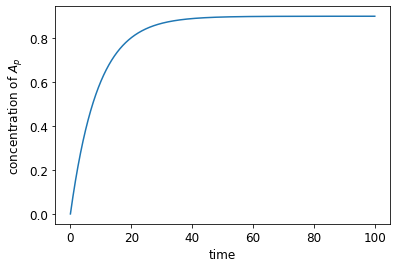

In [2]:
def integration_steps(A_p,t):
    dA_p = k_p*S*(A_T-A_p) +  beta*A_p**n/(K**n+A_p**n) - k_d*A_p
    return dA_p

t = np.arange(0,100,0.01)
S = 0.01

A_p0 = 0
Ap = odeint(integration_steps,A_p0,t)

plt.figure()
plt.rc('font', size=12)
plt.plot(t, Ap,label='$A_p$')
plt.xlabel('time')
plt.ylabel('concentration of $A_p$')
plt.show()

---

<span style="color:red">The curve is very steep in the beginning, and then reaches a steady-state, as we would expect in a positive feedback circuit with cooperativity.  
However, the steady-state value is pretty low, due to the fact that the the stimulus signal S is very low: thus, the concentration of the phosphorilated protein will increase only up to a very low level.</span>

---

Next, starting from the stationary situation obtained in the previous
case, study the effect of suddenly applying a large stimulus signal,
so that $S$ suddenly jumps to a high level, such as $S=1$.

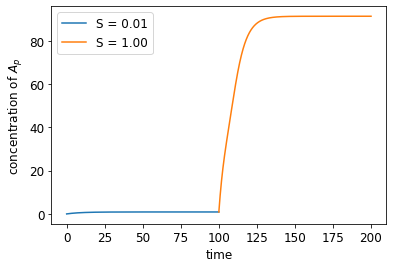

In [3]:
Svec = np.array([0.01, 1])
A_p0 = 0
t_0 = 0

plt.figure(figsize=(6, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    t = np.arange(t_0, t_0+100, 0.01)
    Ap = odeint(integration_steps, A_p0, t)
    plt.plot(t, Ap, label='S = %.2f'%Svec[i])
    t_0 += 100
    A_p0 = Ap[-1]

plt.legend()
plt.xlabel('time')
plt.ylabel('concentration of $A_p$')
plt.show()

---

<span style="color:red">In this graph we can see that when S is increased, also the steady-state value increases. The time needed to move to the new steady-state is not affected by the change in S.</span>

---

Next, starting from the latest stationary situation, integrate
the equations again for $S=0.01$. Does the system go back to its
original state?

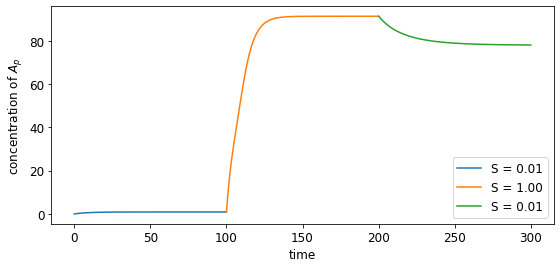

In [4]:
Svec = np.array([0.01, 1, 0.01])
A_p0 = 0
t_0 = 0

plt.figure(figsize=(9, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    t = np.arange(t_0, t_0+100, 0.01)
    Ap = odeint(integration_steps, A_p0, t)
    plt.plot(t, Ap, label='S = %.2f'%Svec[i])
    t_0 += 100
    A_p0 = Ap[-1]


plt.legend(loc='lower right')
plt.xlabel('time')
plt.ylabel('concentration of $A_p$')
plt.show()

---

<span style="color:red">When going back to the lower value of S, the steady-state won't go back to its original value. Instead, it moves down to the first equilibrium that the system finds.  
This is because the new starting point is in the other basin of attraction. The system "remembers" where it is coming from and reaches a steasy-state depending on that: this concept is called "Hysteresis".</span>

---

Finally, continue further to $S=0$, thus eliminating the stimulus
completely. Does the system now go back to its original
state? 

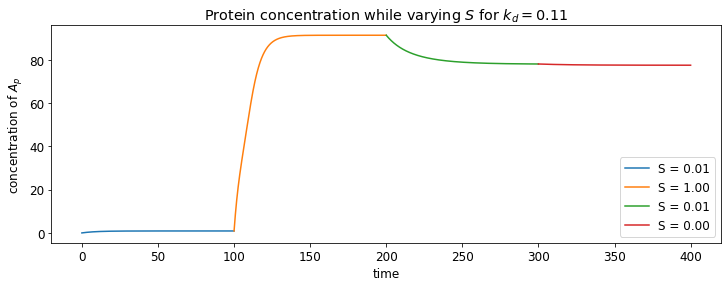

In [5]:
Svec = np.array([0.01, 1, 0.01, 0])
A_p0 = 0
t_0 = 0

plt.figure(figsize=(12, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    t = np.arange(t_0, t_0+100, 0.01)
    Ap = odeint(integration_steps, A_p0, t)
    plt.plot(t, Ap, label='S = %.2f'%Svec[i])
    t_0 += 100
    A_p0 = Ap[-1]

plt.legend(loc='lower right')
plt.title('Protein concentration while varying $S$ for $k_d = 0.11$')
plt.xlabel('time')
plt.ylabel('concentration of $A_p$')
plt.show()

---

<span style="color:red">Even when S becomes 0, the steady state won't go back to its original value. The system is still at equilibrium, and the amount of phosphorilated protein is high enough to induce its own production and keep its own concentration at the same level.  
The system cannot jump down to the lower steady-state unless other parameters are changed: this property of a positive feedback loop is called "irreversibility".</span>

---

Now we will manually compute a bifurcation diagram of the system. 
In order to do this, choose a range of S values from 0 to 1. Start for S=0 considering that the protein is unphosphorylated at the beginning. Then, for each S value do a simulation starting each integration at the previous steady state, and save the new steady state value. Plot the results in a graph where the x axis is S, and the y axis is the steady state reached (from each simulation). Then do the same but in reverse order (starting from high S) and plot the results in a different color.

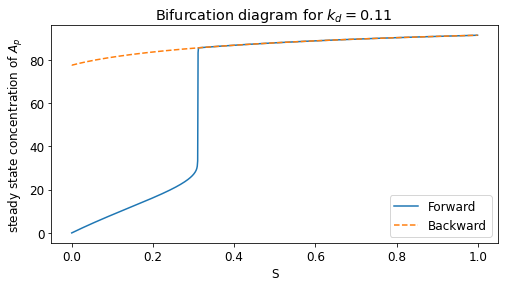

In [6]:
Svec = np.arange(0, 1, 0.001)
t = np.arange(0, 100, 0.01)
ss = np.empty([len(Svec)])
A_p0 = 0

plt.figure(figsize=(8, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    Ap = odeint(integration_steps, A_p0, t)
    ss[i] = Ap[-1]
    A_p0 = Ap[-1]

plt.plot(Svec, ss,label='Forward')

for i in range(len(Svec)):
    S = Svec[-i]
    Ap = odeint(integration_steps, A_p0, t)
    ss[-i] = Ap[-1]
    A_p0 = Ap[-1]

plt.plot(Svec, ss, linestyle='--', label='Backward')
plt.legend(loc='lower right')
plt.title('Bifurcation diagram for $k_d = 0.11$ ')
plt.xlabel('S')
plt.ylabel('steady state concentration of $A_p$')
plt.show()

---

<span style="color:red">In the bifurcation diagram for our system we can see that the behaviour of the system depends on the direction in which the system moves.  
When S is increased starting from 0, the system has a low steady-state, until S reaches a certain value (approximately 0.3 in our case), but then the system jumps to the higher stable equilibrium. Instead, moving with the opposite direction, we can see that the system is "stuck" in the upper stable equilibrium, even when S becomes very low, as we observed in the previous plots.  
For a higher S value, the system only has one stable equilibrium, but below S = 0.3, the system has two stable equilibria: this shows us the bistability of the system. </span>

---

Finally, repeat the analysis above for $k_d=0.13$. First, integrate for fixed values of $S$ (increasing first from $S=0.01$ to $S=1$, and then decreasing back to $S=0.01$ and $S=0$), starting in each case from the previous steady state. Comment on the differences with respect to the case $k_d=0.11$.

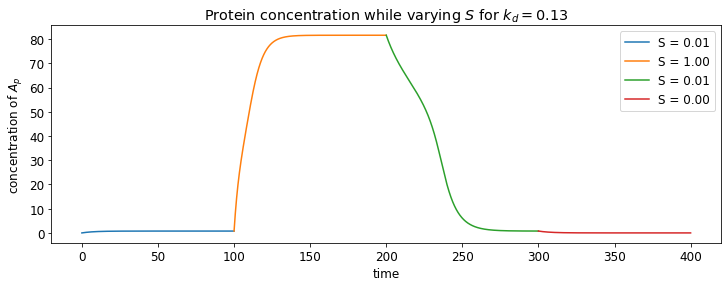

In [7]:
k_d = 0.13
Svec = np.array([0.01, 1, 0.01, 0])
A_p0 = 0
t_0 = 0

plt.figure(figsize=(12, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    t = np.arange(t_0, t_0+100, 0.01)
    Ap = odeint(integration_steps, A_p0, t)
    plt.plot(t, Ap, label='S = %.2f'%Svec[i])
    t_0 += 100
    A_p0 = Ap[-1]

plt.legend(loc='upper right')
plt.title('Protein concentration while varying $S$ for $k_d = 0.13$')
plt.xlabel('time')
plt.ylabel('concentration of $A_p$')
plt.show()

---

<span style="color:red">Now that we increased $k_d$ a little, the system has changed quite drastically.  
The first half is very similar to the original one, only the lower and higher steady-state values are a little lower. However, the second half of the curve is totally different: when the value of S is changed back from 1 to 0.01, the system in this case will move back to the lower steady state, instead of getting stuck in the upper one.  
    This is explained by the fact that, since the $k_d$ is higher and S is very low, the dephosphorilation rate will be higher than before and will exceed the phosphorilation rate generated by the positive feedback loop, so the concentration of the phosphorilated protein will decrease back to the lower stable equilibrium.</span>

---

Finally, calculate numerically the bifurcation diagram for $k_d=0.13$ and compare it again with the case $k_d=0.11$.

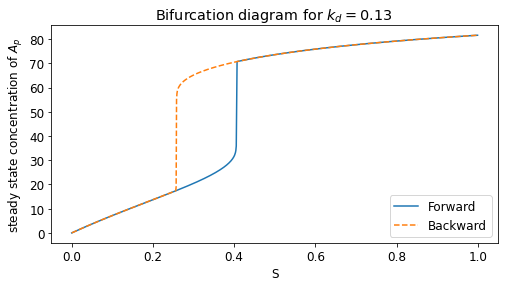

In [8]:
Svec = np.arange(0, 1, 0.001)
t = np.arange(0, 100, 0.01)
A_p0 = 0

plt.figure(figsize=(8, 4))
plt.rc('font', size=12)

for i in range(len(Svec)):
    S = Svec[i]
    Ap = odeint(integration_steps, A_p0, t)
    ss[i] = Ap[-1]
    A_p0 = Ap[-1]

plt.plot(Svec, ss,label='Forward')

for i in range(len(Svec)):
    S = Svec[-i]
    Ap = odeint(integration_steps, A_p0, t)
    ss[-i] = Ap[-1]
    A_p0 = Ap[-1]

plt.plot(Svec, ss, linestyle='--', label='Backward')
plt.legend(loc='lower right')
plt.title('Bifurcation diagram for $k_d = 0.13$ ')
plt.xlabel('S')
plt.ylabel('steady state concentration of $A_p$')
plt.show()

---

<span style="color:red">In this bifurcation diagram we can see a very nice example of hystoresis: in fact, the path differs depending on the starting points (direction) of the system.  
The forward path is the same as the one in the previous case, but in the backward path we can see that when S is decreasing over a certain threshold, the system is going down to the lower stable equilibrium. This means that there is no irreversibility and the bistability of the system is only found when S is within a certain range (0.22 < S < 0.4).</span>

---